# Adım 1 : Gerekli Kütüphaneleri yükledim

In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

# Adım 2: Veri Setini Yükledim

In [2]:
label = []
path = []
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1] == '.png':
            if dir_name.split()[-1] != 'GT':
                label.append(os.path.split(dir_name)[-1])
                path.append(os.path.join(dir_name, filename))

data = pd.DataFrame(columns=['path','label'])
data['path'] = path
data['label'] = label

In [3]:
data

,path,label
0,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
1,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
2,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
3,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
4,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
...,...,...
8995,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8996,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8997,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8998,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream


# Adım 3: Veri Önişleme kısmındayım

                                                path            label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64


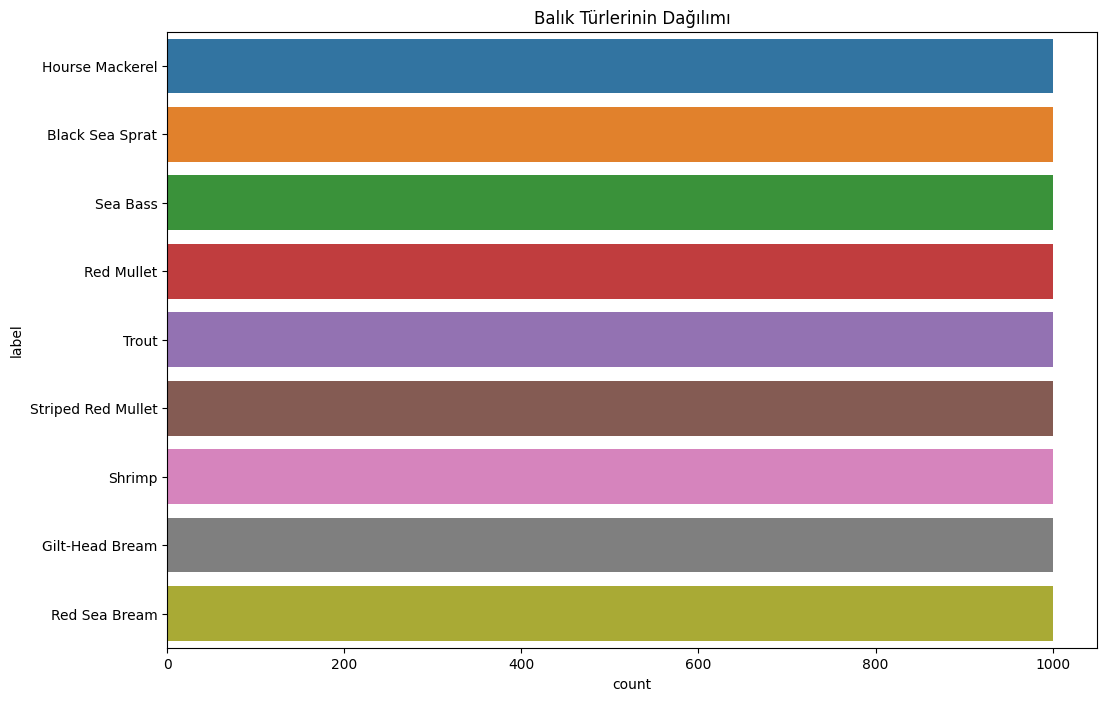

In [4]:
# Veriyi incele
print(data.head())
print(data['label'].value_counts())

# Veri setindeki örnek görüntüleri görselleştir
plt.figure(figsize=(12, 8))
sns.countplot(y='label', data=data)
plt.title('Balık Türlerinin Dağılımı')
plt.show()

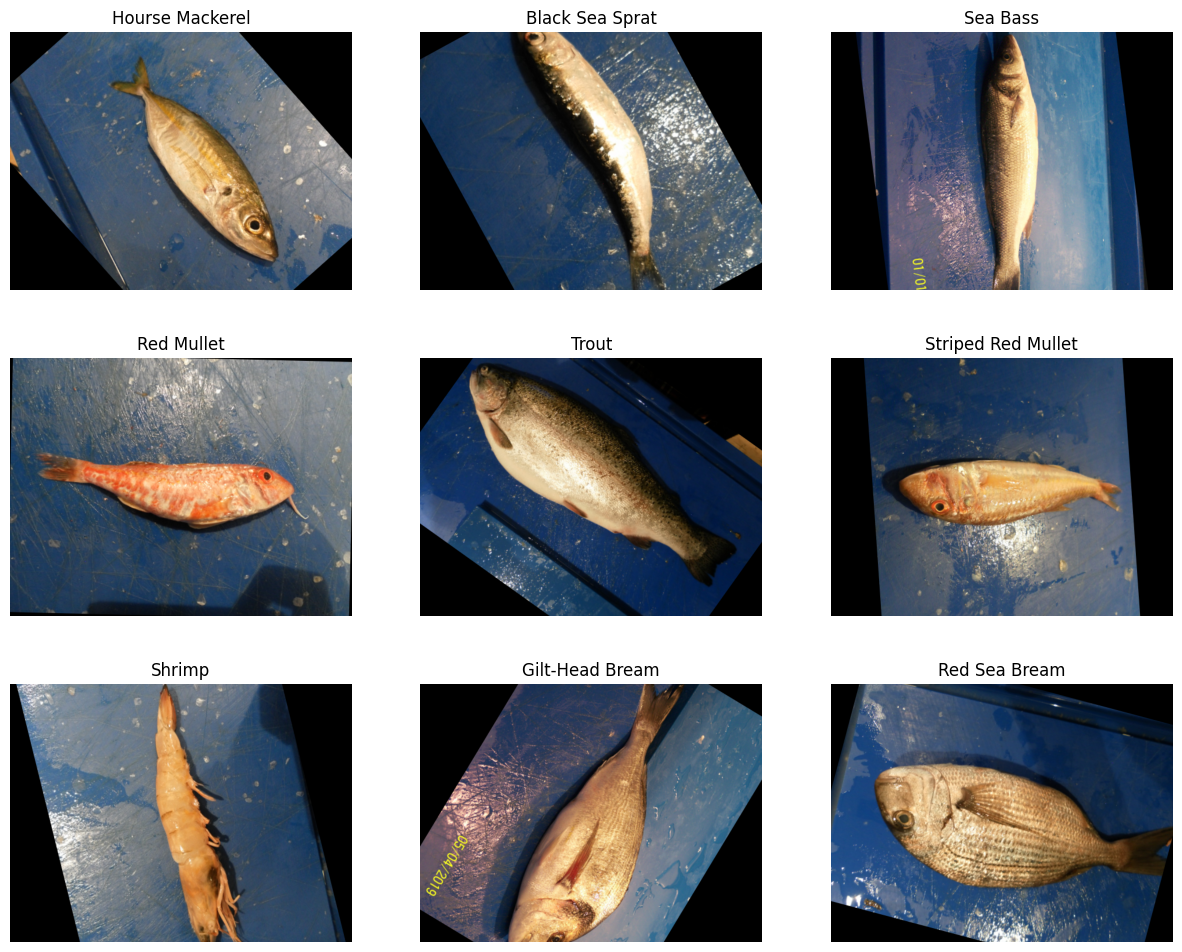

In [5]:
idx = 0
plt.figure(figsize=(15,12))
for unique_label in data['label'].unique():
    plt.subplot(3, 3, idx+1)
    plt.imshow(plt.imread(data[data['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    idx+=1

# ****Adım 4: Eğitim ve Test Setlerine Ayırdım****

In [6]:
# Eğitim ve test setlerine ayır
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])

print("Eğitim Seti Boyutu:", len(train_data))
print("Test Seti Boyutu:", len(test_data))

Eğitim Seti Boyutu: 7200
Test Seti Boyutu: 1800


# Adım 5: Görüntü Verisini Hazırla

In [7]:
# Görüntü veri ön işleme
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Eğitim ve test setleri için görüntüleri oluştur
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32
)

Found 7200 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


# Adım 6: Modeli Oluştur

In [8]:
model = Sequential()

# Katmanlar
model.add(Flatten(input_shape=(224, 224, 3)))  # Giriş katmanı (Görüntüleri tek boyuta indirge)
model.add(Dense(512, activation='relu'))       # Gizli katman
model.add(Dropout(0.5))                        # Dropout overfitting'i önlemek için
model.add(Dense(256, activation='relu'))       # Gizli katman
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))       # Gizli katman
model.add(Dense(9, activation='softmax'))      # Çıkış katmanı (9 sınıf için softmax aktivasyonu)

# Modeli derle
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    77,070,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,236,233 (294.63 MB)

 Trainable params: 77,236,233 (294.63 MB)

 Non-trainable params: 0 (0.00 B)

# Adım 7: Modeli Eğitiyorum

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback'ini oluştur
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [10]:
history = model.fit(train_generator, 
                    epochs=20, 
                    validation_data=test_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size, 
                    validation_steps=test_generator.samples // test_generator.batch_size,
                    callbacks=[early_stopping])

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 0.1223 - loss: 3.4490 - val_accuracy: 0.2690 - val_loss: 2.0794
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 2.1235
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.1983 - loss: 2.1063 - val_accuracy: 0.2773 - val_loss: 1.9432
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1250 - val_loss: 2.1792
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 225s 983ms/step - accuracy: 0.1861 - loss: 2.0722 - val_accuracy: 0.2946 - val_loss: 1.9045
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 1.6814
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 264s 997ms/step - accuracy: 0.1963 - loss: 2.0282 - val_accuracy: 0.2762 - val_loss: 1.8616
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy

# Adım 8:Modelin Performansını Değerlendirme

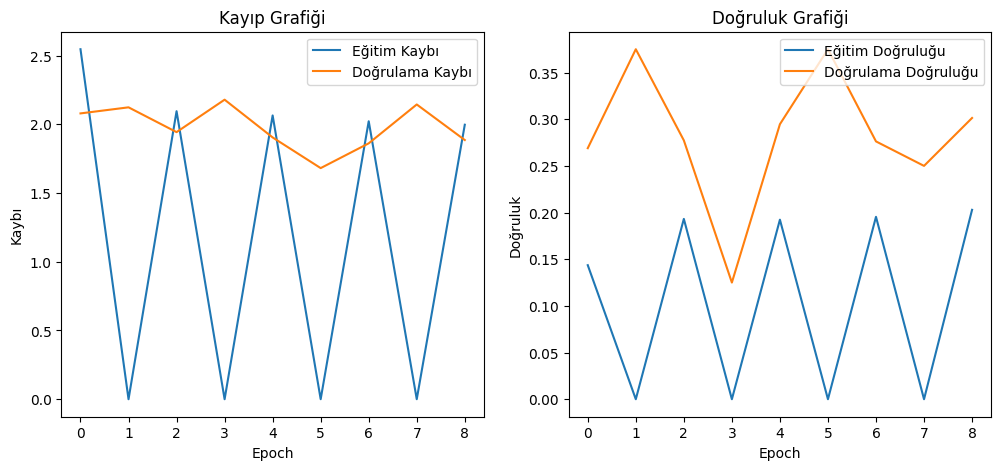

In [11]:
# Eğitim ve doğrulama kaybı ile doğruluk grafiklerini çizme
plt.figure(figsize=(12, 5))

# Kayıp grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend()

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()

# Adım9 :Sonuçları Değerlendirme

57/57 ━━━━━━━━━━━━━━━━━━━━ 23s 407ms/step - accuracy: 0.2872 - loss: 1.9128
Test Kaybı: 1.9035
Test Doğruluğu: 0.2950
57/57 ━━━━━━━━━━━━━━━━━━━━ 23s 403ms/step


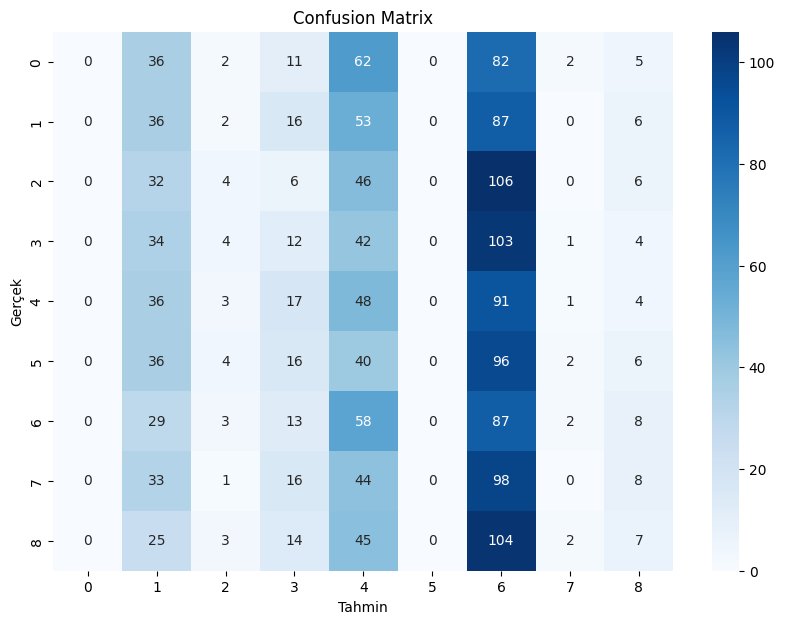

                    precision    recall  f1-score   support

   Black Sea Sprat       0.00      0.00      0.00       200
   Gilt-Head Bream       0.12      0.18      0.14       200
   Hourse Mackerel       0.15      0.02      0.04       200
        Red Mullet       0.10      0.06      0.07       200
     Red Sea Bream       0.11      0.24      0.15       200
          Sea Bass       0.00      0.00      0.00       200
            Shrimp       0.10      0.43      0.17       200
Striped Red Mullet       0.00      0.00      0.00       200
             Trout       0.13      0.04      0.06       200

          accuracy                           0.11      1800
         macro avg       0.08      0.11      0.07      1800
      weighted avg       0.08      0.11      0.07      1800



In [12]:
import numpy as np  # numpy'yi içe aktar

# Test verisi ile modelin değerlendirilmesi
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Test Kaybı: {test_loss:.4f}')
print(f'Test Doğruluğu: {test_accuracy:.4f}')

# Confusion matrix ve classification report
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Gerçek sınıf etiketlerini al
y_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))